<a href="https://colab.research.google.com/github/CoiferousYogi/ML_Practice/blob/main/Toy_Data_Placement_Classification_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [10]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

conyogi_placement_data_for_practice_path = kagglehub.dataset_download('conyogi/placement-data-for-practice')

print('Data source import complete.')


Data source import complete.


In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Importing the Data

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('/content/placement.csv')
df.sample(5)

,Unnamed: 0,cgpa,iq,placement
23,23,4.7,87.0,0
25,25,5.0,91.0,0
65,65,8.1,166.0,1
89,89,4.9,151.0,0
80,80,4.9,196.0,0


#### From the sample, it is evident that the data is uniform

### Basic Questions about the dataset

**Q1. How does the data look like?**

In [14]:
df.sample(5)

,Unnamed: 0,cgpa,iq,placement
22,22,4.9,120.0,0
62,62,6.0,102.0,0
27,27,6.0,124.0,1
53,53,8.3,168.0,1
48,48,6.6,138.0,1


**Q2. What are the dimensions of the dataset?**

In [15]:
df.shape

(100, 4)

We have 100 rows and 4 columns(features)

**Q3. What does the data look like mathematically?(Summary Statistics)**

In [16]:
df.describe()

,Unnamed: 0,cgpa,iq,placement
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,5.991000,123.580000,0.500000
std,29.011492,1.143634,39.944198,0.502519
min,0.000000,3.300000,37.000000,0.000000
25%,24.750000,5.075000,101.500000,0.000000
50%,49.500000,6.000000,127.500000,0.500000
75%,74.250000,6.900000,149.000000,1.000000
max,99.000000,8.500000,233.000000,1.000000


**Q4. What are the datatypes of the features?**

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


From the looks of it, there seems to be no discrepency in the datatypes of the features.

**Q5. Does the data have any missing values?**

In [18]:
df.isna().sum()

,0
Unnamed: 0,0
cgpa,0
iq,0
placement,0


There are no missing values in the dataset.

**Q6. Does the data have any duplicate values?**

In [19]:
df.duplicated().sum()

np.int64(0)

There are no duplicate values in the dataset

**Q7. What is the correlation between different columns(features)?**

In [20]:
df.corr()

,Unnamed: 0,cgpa,iq,placement
Unnamed: 0,1.000000,0.047478,-0.019080,0.144807
cgpa,0.047478,1.000000,-0.098791,0.821688
iq,-0.019080,-0.098791,1.000000,-0.083031
placement,0.144807,0.821688,-0.083031,1.000000


## Exploratory Data Analysis

**Plotting a Scatterplot to understand the distribution of data**

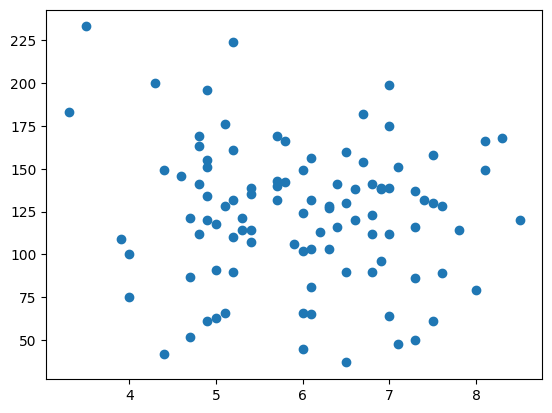

In [21]:
plt.scatter(df['cgpa'], df['iq'])

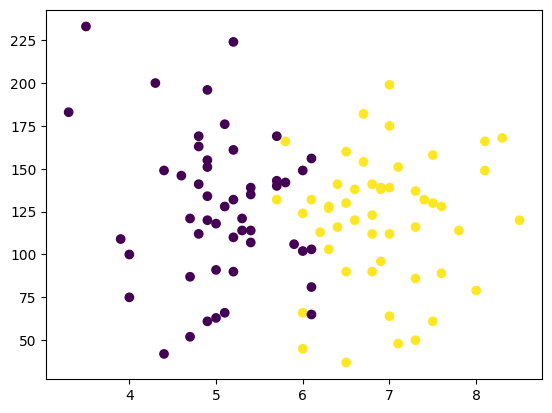

In [22]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

**By looking at the spread of the data, we can apply Logistic Regression to classify the students on the basis of placements.**

#### Extract the input and output columns

**It is quite clear that the unnamed column serves no purpose. So we drop it.**

In [23]:
df1 = df.copy()
df1.sample(2)

,Unnamed: 0,cgpa,iq,placement
44,44,7.5,61.0,1
60,60,6.9,139.0,1


In [24]:
df1.drop(labels='Unnamed: 0', axis=1, inplace=True)
print(df1)

    cgpa     iq  placement
0    6.8  123.0          1
1    5.9  106.0          0
2    5.3  121.0          0
3    7.4  132.0          1
4    5.8  142.0          0
..   ...    ...        ...
95   4.3  200.0          0
96   4.4   42.0          0
97   6.7  182.0          1
98   6.3  103.0          1
99   6.2  113.0          1

[100 rows x 3 columns]


In [25]:
# X contains the independent variable
# y contains the dependent variable
X = df1.iloc[:,0:2]
y = df1.iloc[:,-1]

In [26]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [27]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [28]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [29]:
X_train

,cgpa,iq
83,7.5,130.0
8,6.1,156.0
84,5.7,169.0
10,6.0,45.0
11,6.9,138.0
...,...,...
0,6.8,123.0
38,6.5,160.0
47,5.2,161.0
97,6.7,182.0


In [30]:
y_train

,placement
83,1
8,0
84,0
10,1
11,1
...,...
0,1
38,1
47,0
97,1


In [31]:
X_test

,cgpa,iq
1,5.9,106.0
70,6.3,127.0
46,5.3,114.0
22,4.9,120.0
91,7.5,158.0
34,4.8,163.0
81,5.4,107.0
89,4.9,151.0
65,8.1,166.0
29,7.0,112.0


In [32]:
y_test

,placement
1,0
70,1
46,0
22,0
91,1
34,0
81,0
89,0
65,1
29,1


### Scaling the data

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
X_train = scaler.fit_transform(X_train)
X_train

array([[ 1.41784751,  0.21090897],
       [ 0.14337784,  0.86178532],
       [-0.22075635,  1.18722349],
       [ 0.05234429, -1.91695602],
       [ 0.87164622,  0.41117862],
       [-1.40419247,  0.68654938],
       [ 1.96404879,  0.68654938],
       [ 0.50751203, -2.11722566],
       [-0.85799119, -0.76540555],
       [-0.493857  ,  0.43621232],
       [-1.40419247, -1.99205713],
       [ 0.41647848,  0.48627973],
       [ 0.68957912,  0.81171791],
       [-0.22075635,  0.46124603],
       [-1.76832667, -0.5401022 ],
       [-0.94902474,  1.86313355],
       [ 0.05234429, -1.3912482 ],
       [-0.94902474,  0.83675161],
       [-0.85799119, -0.0894955 ],
       [ 0.05234429,  0.06070674],
       [ 0.78061267, -0.79043926],
       [ 0.50751203,  0.21090897],
       [ 0.59854558,  0.41117862],
       [-1.13109183, -0.01439438],
       [-0.76695764, -1.3912482 ],
       [-0.76695764,  1.36245943],
       [ 1.23578041, -0.13956291],
       [-1.76832667, -1.16594484],
       [-0.12972281,

In [36]:
X_test = scaler.transform(X_test)
X_test

array([[-0.03868926, -0.38989997],
       [ 0.32544493,  0.13580785],
       [-0.58489054, -0.18963032],
       [-0.94902474, -0.03942809],
       [ 1.41784751,  0.91185273],
       [-1.04005828,  1.03702126],
       [-0.493857  , -0.36486626],
       [-0.94902474,  0.73661679],
       [ 1.96404879,  1.11212238],
       [ 0.96267977, -0.23969773],
       [ 0.96267977,  1.93823467],
       [ 2.32818298, -0.03942809],
       [-0.58489054, -0.01439438],
       [-1.85936021, -0.31479885],
       [ 1.05371332, -1.8418549 ],
       [ 0.96267977,  0.43621232],
       [-1.49522602,  1.96326837],
       [ 1.32681396,  0.26097638],
       [ 0.96267977,  1.33742573],
       [ 0.14337784, -1.4162819 ]])

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
rl = LogisticRegression()

### Model Training

In [39]:
rl.fit(X_train, y_train)

LogisticRegression()

In [40]:
y_predict = rl.predict(X_test)

### Calculating Accuracy Score

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.95

### Plotting the decision boundary

<Axes: >

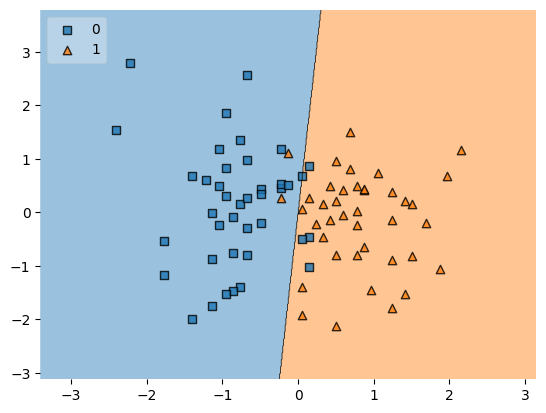

In [42]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.values, clf=rl, legend=2)

In [43]:
import pickle

In [44]:
pickle.dump(rl,open('model:pkl', 'wb'))